# **Results**

### Basic setup:

In [1]:
# magics
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_new import model_bufferstock
import tools

### 1. Run model for different values of $\lambda$:

c:\Users\peter\OneDrive\Skole\Semester 8\Dyn Prog\BufferStock\model_new.py:192: RuntimeWarning: divide by zero encountered in reciprocal
  v_guess = (c**(1-par.rho)-1)/(1-par.rho) + par.beta * V_next


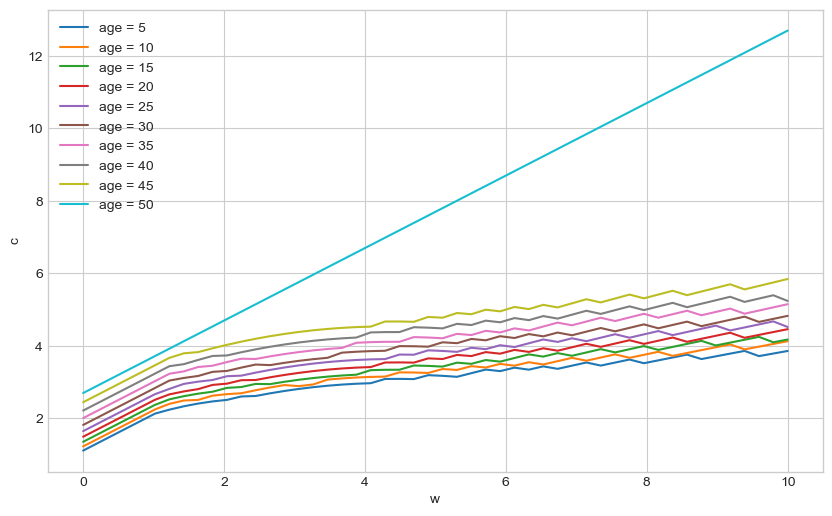

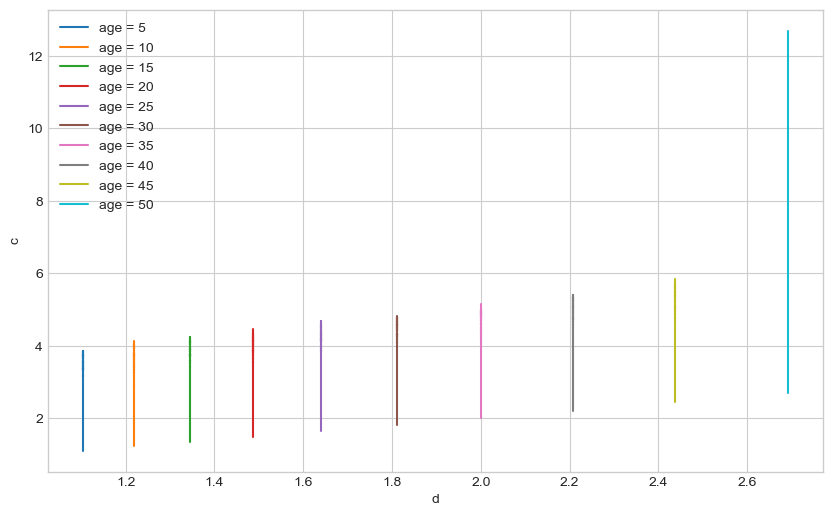

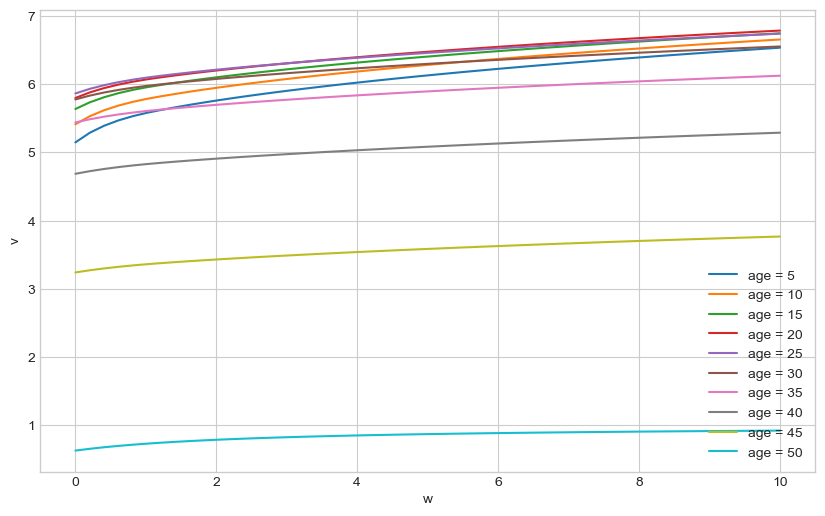

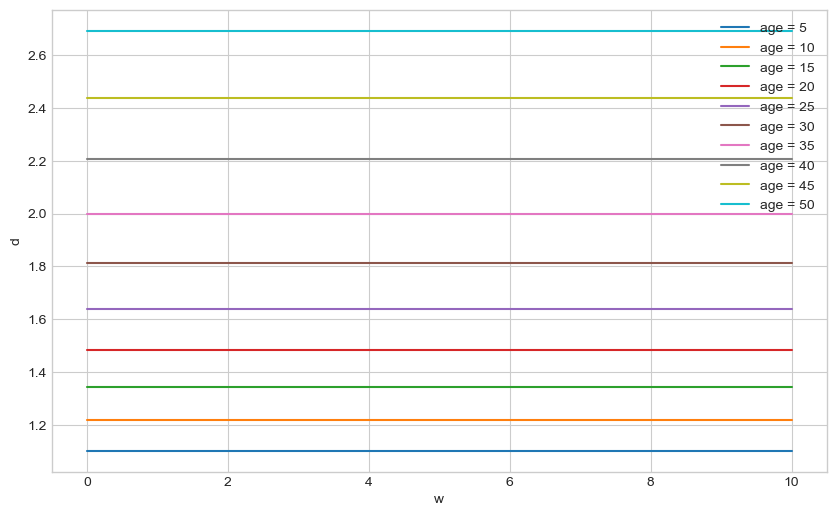

In [2]:
model = model_bufferstock()

model.setup()

model.create_grids()

sol = model.solve(shocks=True, debt=True)

def draw_graph(x_value, y_value, x, y):

    fig = plt.figure(figsize=(10,6))

    ax = fig.add_subplot(1,1,1)

    for i in range(0,model.par.T,1):
        if (i+1)%5 == 0:
            ax.plot(x_value[i,:],y_value[i,:], label=f'age = {i+1}')

    ax.set_xlabel(x)
    ax.set_ylabel(y)                 

    plt.legend()
    plt.show()

draw_graph(sol.grid_w, sol.c, "w", "c")

draw_graph(sol.d, sol.c, "d", "c")

draw_graph(sol.grid_w, sol.v, "w", "v")

draw_graph(sol.grid_w, sol.d, "w", "d")




Calculate the following easy model:

$$\begin{align*}
    V_t^*(W_t) &= \max_{0\leq c_t \leq W_t} \{ \sqrt{c_t} +\beta V_{t+1}(W1_{t+1} + W2_{t+1}) \} \\
    & \text{s.t.} \\
    W1_{t+1} &= W1_t -c_t\\
    W2_{t+1} &= W2_t -c_t\\
    c_t &\in \mathbb{N}_0, \, \forall t
\end{align*}$$

In [5]:
import numpy as np

# 1. Setup
beta = 0.9
W1 = 5  # State variable 1 range
W2 = 5  # State variable 2 range
T = 3

# 2. Initialize
Vstar_bi = np.nan + np.zeros([W1 + 1, W2 + 1, T])
Cstar_bi = np.nan + np.zeros([W1 + 1, W2 + 1, T])
Cstar_bi[:, :, T - 1] = np.add(np.reshape(np.arange(W1+1), (W1+1, 1)), np.arange(W2+1))  # Initialize Cstar_bi with state 1 values
Vstar_bi[:, :, T - 1] = np.sqrt(Cstar_bi[:, :, T - 1])

# 3. Solve
# Loop over periods
for t in range(T - 2, -1, -1):  # from period T-2 until period 0, backwards
    # Loop over states
    for w1 in range(W1 + 1):
        for w2 in range(W2 + 1):
            c1 = np.add(np.reshape(np.arange(w2+1), (w2+1, 1)), np.arange(w1+1))

            w1_c = w1 - c1
            w2_c = w2 - c1

            V_next = Vstar_bi[w2_c, w1_c, t + 1]  # Consider the next period's value at state 2

            V_guess = np.sqrt(c1) + beta * V_next
        
            
            Vstar_bi[w1, w2, t] = np.amax(V_guess)

            index_ = V_guess.argmax()
            index = np.unravel_index(index_, V_guess.shape)

            Cstar_bi[w1, w2, t] = sum(index)


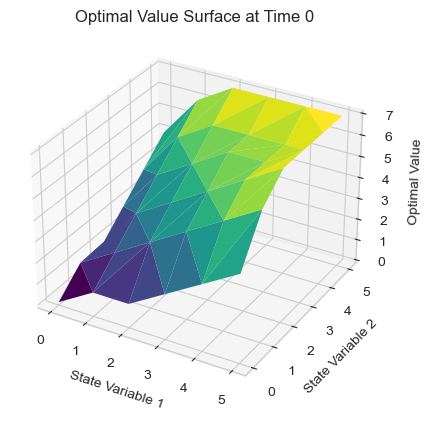

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting the output
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create coordinate arrays for the state variables
W1_vals = np.arange(W1 + 1)
W2_vals = np.arange(W2 + 1)
W1_mesh, W2_mesh = np.meshgrid(W1_vals, W2_vals)

# Reshape the coordinate arrays
W1_mesh = W1_mesh.reshape((W1 + 1) * (W2 + 1))
W2_mesh = W2_mesh.reshape((W1 + 1) * (W2 + 1))
Vstar_mesh = Vstar_bi[:, :, 0].reshape((W1 + 1) * (W2 + 1))
Cstar_mesh = Cstar_bi[:, :, 0].reshape((W1 + 1) * (W2 + 1))

# Plot the surface
ax.plot_trisurf(W1_mesh, W2_mesh, Cstar_mesh, cmap='viridis')
ax.set_xlabel('State Variable 1')
ax.set_ylabel('State Variable 2')
ax.set_zlabel('Optimal Value')
ax.set_title('Optimal Value Surface at Time 0')

plt.show()

print("Hej")

Her ovenover plottes for t = 1. Hvis man har "state variable 2" = 0, så burde "state variable 1" ligne den blå nedenfor... Det gør den bare ikke?!?!?

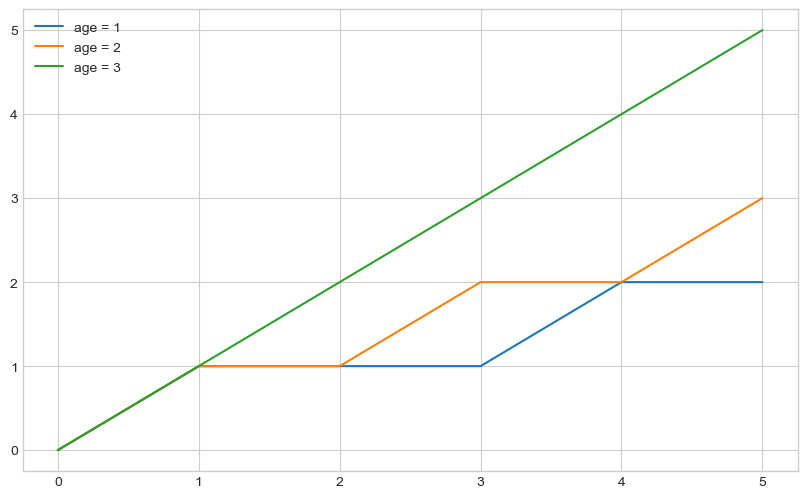

In [8]:
import numpy as np

# 1. Setup 
beta = 0.9
W = 5
T = 3
w_temp = np.arange(W+1)

# 2. Initialize
Vstar_bi = np.nan + np.zeros([W+1, T])
Cstar_bi = np.nan + np.zeros([W+1, T])
Cstar_bi[:, T-1] = np.arange(W+1) 
Vstar_bi[:, T-1] = np.sqrt(Cstar_bi[:, T-1])

# 3. Solve
# Loop over periods
for t in range(T-2, -1, -1):  # From period T-2 to period 0, backwards
    # Loop over states
    for iw, w in enumerate(w_temp):
        c = np.arange(w+1)
        w_c = w - c
        V_next = Vstar_bi[w_c, t+1]
        V_guess = np.sqrt(c) + beta * V_next
        Vstar_bi[iw, t] = np.amax(V_guess)
        Cstar_bi[iw, t] = np.argmax(V_guess)
        

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for i in range(0,3,1):
        ax.plot(w_temp,Cstar_bi[:,i], label=f'age = {i+1}')
        
plt.legend()
plt.show()
